## 2. MusicNet pitch differences

This tutorial demontrates the data using one recording as example. It depends on the NumPy, matplotlib, and intervaltree packages.

In [6]:
import os,sys,shutil,mmap
import numpy as np                      # fast vectors and matrices
import matplotlib.pyplot as plt         # plotting

from IPython.display import Audio

from intervaltree import Interval,IntervalTree

import pickle

import sys

sys.path.insert(0,'lib/')
import config

%matplotlib inline

### Constants

A recording of a musical performance is a real-valued time series. The values of this time series represent sound pressure variations sampled at regular intervals, in this case 44,100Hz. The human ear interprets pressure periodicities as musical notes.

In [7]:
fs = 44100      # samples/second
sz_float = 4
window = 16384


### Import
Import the recordings.

In [19]:
with open(config.labels_path, 'rb') as f:
    labels = pickle.load(f)

In [9]:
data = dict()
for record in os.listdir(config.records_path):
    fd = os.open(config.records_path + record, os.O_RDONLY)
    buff = mmap.mmap(fd, 0, mmap.MAP_SHARED, mmap.PROT_READ)
    data[int(record[:-4])] = (buff, len(buff)/sz_float)
    os.close(fd)

In [15]:
rec_id = 2494
print( "recording", rec_id)
print ("Python-Type of Labels:",type(labels[rec_id]))
print ("Length of recording:", data[rec_id][1])

recording 2494
Python-Type of Labels: <class 'intervaltree.intervaltree.IntervalTree'>
Length of recording: 13100544.0


### The Intervals
Extract frames of window size 16384 in every music sample and count the jumps of different semitones.

In [20]:
# count jumps of 0 to 128 semitones
jumps = np.zeros(128)

In [21]:
for rec_id in labels.keys():
    frames =  int(data[rec_id][1] / window )
    print("Music sample {} contains {} windows of length {} seconds.".format(rec_id, frames, float(window)/fs))

    YY_per_window = np.zeros((frames, 128))
    Y = labels[rec_id]
    for i in range(frames):
        labels_tmp = Y[i*window]
        for label in labels_tmp:
            YY_per_window[i,label.data[1]] = 1
      
    # count the number of apearances of the different pitch jumps.
    
    #register first window
    pitches = YY_per_window[0]

    for i in range(1,frames):
        tmp = YY_per_window[i]
        for j in np.where(pitches==1)[0]:
            for k in np.where(tmp==1)[0]:
                jumps[np.abs(j-k)] += 1
        pitches = tmp
    
jumps = jumps / sum(jumps)

Music sample 2560 contains 1021 windows of length 0.37151927437641724 seconds.
Music sample 1792 contains 1272 windows of length 0.37151927437641724 seconds.
Music sample 2562 contains 889 windows of length 0.37151927437641724 seconds.
Music sample 2506 contains 505 windows of length 0.37151927437641724 seconds.
Music sample 2564 contains 1490 windows of length 0.37151927437641724 seconds.
Music sample 2566 contains 1090 windows of length 0.37151927437641724 seconds.
Music sample 1793 contains 1359 windows of length 0.37151927437641724 seconds.
Music sample 2568 contains 1286 windows of length 0.37151927437641724 seconds.
Music sample 2570 contains 1364 windows of length 0.37151927437641724 seconds.
Music sample 2571 contains 1453 windows of length 0.37151927437641724 seconds.
Music sample 2572 contains 541 windows of length 0.37151927437641724 seconds.
Music sample 2573 contains 915 windows of length 0.37151927437641724 seconds.
Music sample 2575 contains 817 windows of length 0.37151

Music sample 2218 contains 538 windows of length 0.37151927437641724 seconds.
Music sample 2219 contains 702 windows of length 0.37151927437641724 seconds.
Music sample 2220 contains 812 windows of length 0.37151927437641724 seconds.
Music sample 2221 contains 649 windows of length 0.37151927437641724 seconds.
Music sample 2222 contains 543 windows of length 0.37151927437641724 seconds.
Music sample 2224 contains 292 windows of length 0.37151927437641724 seconds.
Music sample 2225 contains 575 windows of length 0.37151927437641724 seconds.
Music sample 2227 contains 348 windows of length 0.37151927437641724 seconds.
Music sample 2228 contains 264 windows of length 0.37151927437641724 seconds.
Music sample 2229 contains 658 windows of length 0.37151927437641724 seconds.
Music sample 2230 contains 227 windows of length 0.37151927437641724 seconds.
Music sample 2231 contains 311 windows of length 0.37151927437641724 seconds.
Music sample 2232 contains 211 windows of length 0.3715192743764

Music sample 2368 contains 1169 windows of length 0.37151927437641724 seconds.
Music sample 2371 contains 552 windows of length 0.37151927437641724 seconds.
Music sample 2372 contains 615 windows of length 0.37151927437641724 seconds.
Music sample 2373 contains 857 windows of length 0.37151927437641724 seconds.
Music sample 2374 contains 582 windows of length 0.37151927437641724 seconds.
Music sample 2529 contains 741 windows of length 0.37151927437641724 seconds.
Music sample 2376 contains 1564 windows of length 0.37151927437641724 seconds.
Music sample 2377 contains 2066 windows of length 0.37151927437641724 seconds.
Music sample 2379 contains 899 windows of length 0.37151927437641724 seconds.
Music sample 2443 contains 2786 windows of length 0.37151927437641724 seconds.
Music sample 2381 contains 1508 windows of length 0.37151927437641724 seconds.
Music sample 2382 contains 317 windows of length 0.37151927437641724 seconds.
Music sample 2383 contains 1033 windows of length 0.3715192

Music sample 2537 contains 772 windows of length 0.37151927437641724 seconds.
Music sample 1933 contains 946 windows of length 0.37151927437641724 seconds.
Music sample 2471 contains 1220 windows of length 0.37151927437641724 seconds.
Music sample 2540 contains 709 windows of length 0.37151927437641724 seconds.
Music sample 2542 contains 1752 windows of length 0.37151927437641724 seconds.
Music sample 2284 contains 612 windows of length 0.37151927437641724 seconds.
Music sample 2550 contains 485 windows of length 0.37151927437641724 seconds.
Music sample 2217 contains 501 windows of length 0.37151927437641724 seconds.
Music sample 1876 contains 959 windows of length 0.37151927437641724 seconds.
Music sample 1791 contains 946 windows of length 0.37151927437641724 seconds.
Music sample 2556 contains 407 windows of length 0.37151927437641724 seconds.
Music sample 2557 contains 2051 windows of length 0.37151927437641724 seconds.
Music sample 1824 contains 680 windows of length 0.3715192743

The plots shows that there are more and less probable pitch differences.

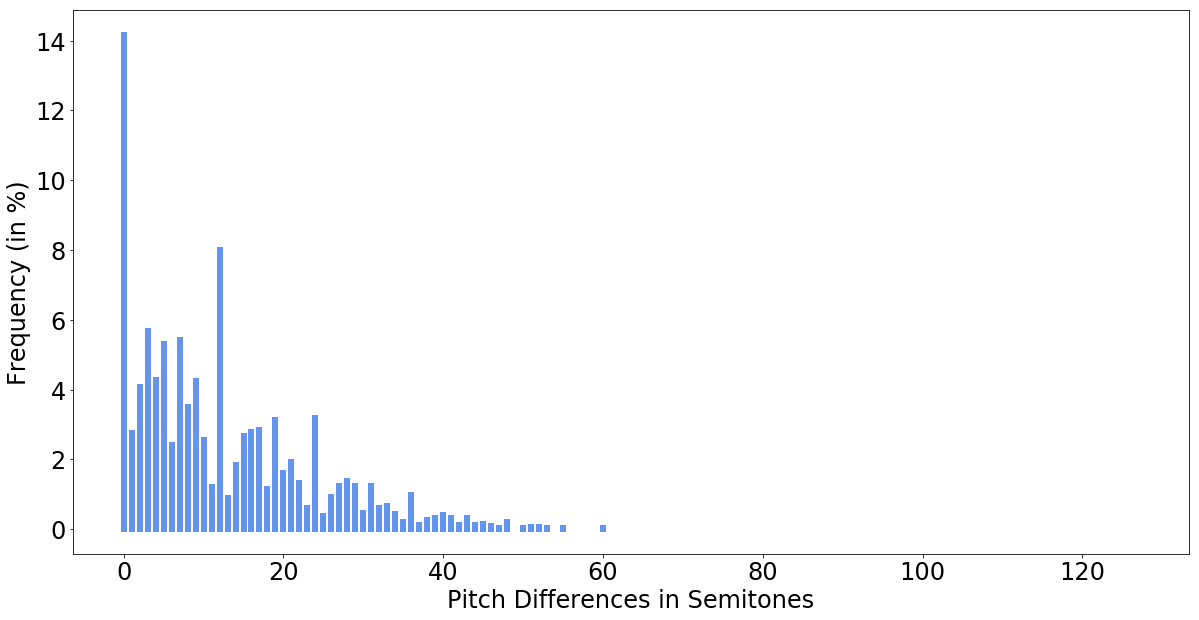

In [37]:
fig = plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=24
plt.rcParams['ytick.labelsize']=24
for i in range(128):
    plt.plot([i,i],[0,100*jumps[i]], c='cornflowerblue', linewidth = 6)
plt.xlabel('Pitch Differences in Semitones',fontsize=24)
plt.ylabel('Frequency (in %)',fontsize=24)

plt.savefig("pictures/pitch_differences_in_music_net.png")

The most probable pitch differences (in half tones) are:

In [23]:
chords = ["Perfect unison", "Minor second", "Major second", "Minor third", "Major third", "Perfect fourth", 
          "Tritone", "Perfect fifth", "Minor sixth", "Major sixth", "Minor seventh", "Major seventh", 
          "Perfect octave", "", "", "", "", "", "", "", "", "", "", "", 
         "Double octave", ""]


In [26]:
print("Semitones\t Chord\t\t\tFrequency of Pitch Difference ")
sorting = np.argsort(-jumps)
for i in range(30):
    if chords[min(sorting[i],25)] == "":
        print (sorting[i],"\t\t",chords[min(sorting[i],25)],"\t\t\t",np.round(jumps[sorting[i]]*100,2),"%")
    else:
        print (sorting[i],"\t\t",chords[min(sorting[i],25)],"\t\t",np.round(jumps[sorting[i]]*100,2),"%")

Semitones	 Chord			Frequency of Pitch Difference 
0 		 Perfect unison 		 14.16 %
12 		 Perfect octave 		 8.0 %
3 		 Minor third 		 5.68 %
7 		 Perfect fifth 		 5.41 %
5 		 Perfect fourth 		 5.32 %
4 		 Major third 		 4.28 %
9 		 Major sixth 		 4.23 %
2 		 Major second 		 4.06 %
8 		 Minor sixth 		 3.49 %
24 		 Double octave 		 3.18 %
19 		  			 3.11 %
17 		  			 2.84 %
16 		  			 2.79 %
1 		 Minor second 		 2.77 %
15 		  			 2.67 %
10 		 Minor seventh 		 2.56 %
6 		 Tritone 		 2.41 %
21 		  			 1.93 %
14 		  			 1.83 %
20 		  			 1.62 %
28 		  			 1.39 %
22 		  			 1.31 %
29 		  			 1.23 %
31 		  			 1.23 %
27 		  			 1.22 %
11 		 Major seventh 		 1.19 %
18 		  			 1.16 %
36 		  			 0.96 %
26 		  			 0.91 %
13 		  			 0.89 %


Print the table to file in LATEX-Style

In [34]:
F = open("pictures/interval_frequencies_music_net.txt","w")

F.write("Semitones & Chord & Frequency of Pitch Difference \\\\ \n  \\hlineB{2} \n")
sorting = np.argsort(-jumps)
for i in range(30):
    
    if i%2 == 0:
        F.write('\\rowcolor{lightlightgray}')
    
    F.write ('{} & {} & {}\% \\\\ \n'.format(sorting[i],chords[min(sorting[i],25)],np.round(jumps[sorting[i]]*100,2)))
    
F.close()

In [39]:

for i in range(60,128):
    print (jumps[i])
print()
print(np.where(jumps==0))

0.00020611964921889015
1.052181455436743e-05
1.9155098291284297e-05
2.7518591911422508e-05
3.210502389665959e-05
1.6726987240276425e-05
2.9676912845651727e-06
1.699677735705508e-05
2.6979011677865206e-06
2.9676912845651727e-06
2.4281110510078686e-06
2.6979011677865206e-07
4.0468517516797805e-06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.6979011677865206e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

(array([ 73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127]),)
